# Notebook to analyze UV-vis data

In [1]:
# Import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import os

In [2]:
# Import data
data = pd.read_excel('./UV_Vis/Paninis_April_2019.xlsx', sheet_name='Sheet1')
columns = data.columns
data["Energy"] = (4.135667516E-15)*(299792458)/(data[columns[0]]*1E-9)
columns = data.columns
data.head()

,Wavelength nm.,Paninis_April_2019_162833,Paninis_April_2019_163151,Paninis_April_2019_163549,Paninis_April_2019_163903,Energy
0,300.0,0.033,0.095,21.648,2.991,4.132806
1,300.5,0.034,0.089,21.781,3.006,4.125930
2,301.0,0.036,0.086,21.932,2.989,4.119076
3,301.5,0.039,0.084,22.088,2.990,4.112245
4,302.0,0.036,0.083,22.205,2.998,4.105437


In [3]:
list(columns)[1:7]
sub_columns = list(columns)[1:5]

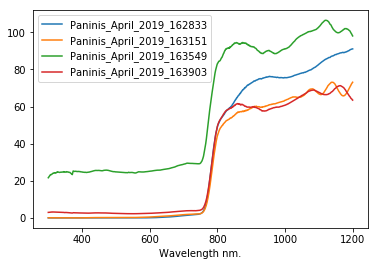

In [4]:
data.plot(x=columns[0], y=sub_columns)

In [5]:
for column in sub_columns:
    name = 'A_' + column
    data[name] = 100 - data[column]
columns = data.columns

In [6]:
list(columns)[8:14]
a_columns = list(columns)[(len(sub_columns)+2):(len(sub_columns)*2+2)]
a_columns

['A_Paninis_April_2019_162833',
 'A_Paninis_April_2019_163151',
 'A_Paninis_April_2019_163549',
 'A_Paninis_April_2019_163903']

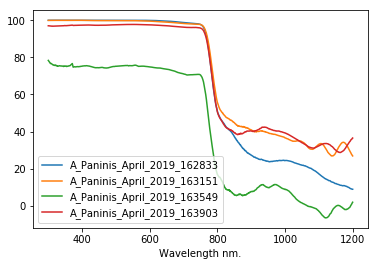

In [7]:
data.plot(x=columns[0], y=a_columns)

In [15]:
for column in sub_columns:    
    absorbance = 100 - data[column]
    alpha = -(1/0.00000050)*np.log(data[column]/100)
    name = column + '_Tauc_direct'
    data[name] = np.power(data['Energy'], 2) * np.power(alpha, 2)
    
columns = data.columns

In [16]:
t_columns = list(columns)[(len(sub_columns)*2+2):(len(sub_columns)*3+2)]

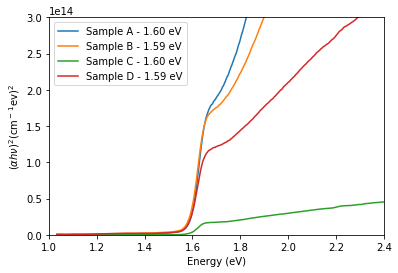

In [24]:
data.plot(x='Energy', y=t_columns)
#data.plot(x='Energy', y=[columns[14], columns[15],
 #                       columns[16], columns[17]])
plt.xlim(1, 2.4)
plt.ylim(0, 0.3E15)
plt.xlabel('Energy (eV)')
plt.ylabel(r'($\alpha h \nu$)$^2$(cm$^-$$^1$ev)$^2$')
plt.legend(['Sample A - 1.60 eV', 'Sample B - 1.59 eV', 'Sample C - 1.60 eV', 
            'Sample D - 1.59 eV', 'Sample 5 - 1.57 eV', 'Sample 6 - 1.58 eV'])
plt.savefig('tauc_plots_paninis_apr2019.png', dpi=300)

1.6
1.59
1.6
1.59


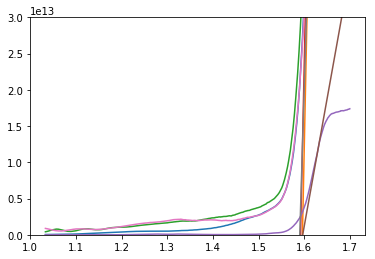

In [18]:
sub_data = data[data.Energy < 1.7]

for column in t_columns:
    x = np.array(sub_data.Energy)
    y = np.array(sub_data[column])
    plt.plot(x, (y))
    y_1 = np.diff(y)/np.diff(x)
    #plt.plot(x[:-1], normalize(y_1))
    #plt.axvline(x[np.argmax(y_1)])
    slope = max(np.diff(y)/np.diff(x))
    b = y[np.argmax(y_1)] - slope*x[np.argmax(y_1)]
    band_gap = -b/slope
    plt.plot(x, slope*x+b)
    plt.ylim(0, 0.3e14)
    print(np.round(band_gap, 2))

In [151]:
def normalize(x):
    return (x-max(x))/(max(x)-min(x))